<a href="https://colab.research.google.com/github/rafahcerqueira/marine-data-analysis/blob/main/Atividade_Avaliativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Faculdade ADS/6° Semestre/Análise de Dados/Colab Notebooks/Trabalho Inferências"

Mounted at /content/drive


In [ ]:
dados = pd.read_csv(path + '/age_dataset.csv', sep=',')

## Limpeza de incongruências

In [ ]:
df_selection = dados[['Occupation', 'Manner of death', 'Age of death']]

incongruity_len = len(
    df_selection[
        (df_selection['Manner of death'] == 'capital punishment; suicide') |
        (df_selection['Manner of death'] == 'homicide; natural causes') |
        (df_selection['Manner of death'] == 'capital punishment; homicide') |
        (df_selection['Manner of death'] == 'suicide; natural causes')
      ]
    )

death_types_undefined_len = df_selection['Manner of death'].isna().sum()

print(f"Incongruências: {incongruity_len}")
print(f"Não definido: {death_types_undefined_len}")

Incongruências: 92
Não definido: 1169406


## Limpeza de idade da morte

In [ ]:
# Número de registros antes da limpeza
antes_limpeza_oficial_marinha = len(dados[dados['Occupation'] == 'Naval officer'])
antes_limpeza_marinheiro = len(dados[dados['Occupation'] == 'Sailor'])

# Filtrando os dados onde 'Age of death' não é nulo
oficial_marinha = dados[(dados['Occupation'] == 'Naval officer') & (dados['Age of death'].notna())]
marinheiro = dados[(dados['Occupation'] == 'Sailor') & (dados['Age of death'].notna())]

# Número de registros após a limpeza
depois_limpeza_oficial_marinha = len(oficial_marinha)
depois_limpeza_marinheiro = len(marinheiro)

# Exibindo os resultados
print(f"Antes da limpeza (Naval officer): {antes_limpeza_oficial_marinha} registros")
print(f"Depois da limpeza (Naval officer): {depois_limpeza_oficial_marinha} registros")
print(f"Registros removidos (Naval officer): {antes_limpeza_oficial_marinha - depois_limpeza_oficial_marinha}")

print(f"Antes da limpeza (Sailor): {antes_limpeza_marinheiro} registros")
print(f"Depois da limpeza (Sailor): {depois_limpeza_marinheiro} registros")
print(f"Registros removidos (Sailor): {antes_limpeza_marinheiro - depois_limpeza_marinheiro}")


Antes da limpeza (Naval officer): 948 registros
Depois da limpeza (Naval officer): 948 registros
Registros removidos (Naval officer): 0
Antes da limpeza (Sailor): 793 registros
Depois da limpeza (Sailor): 793 registros
Registros removidos (Sailor): 0
Número de valores nulos em 'Age of death' (Naval officer): 0
Número de valores nulos em 'Age of death' (Sailor): 0


### Criação de Histograma para facilitar a visualização dos resultados para Marinheiro e Oficial da Marinha

Estatísticas descritivas (Naval Officer):
count    948.000000
mean      73.175105
std       12.857144
min       25.000000
25%       65.000000
50%       75.000000
75%       82.000000
max       99.000000
Name: Age of death, dtype: float64

Estatísticas descritivas (Sailor):
count    793.000000
mean      68.211854
std       18.866771
min       19.000000
25%       58.000000
50%       72.000000
75%       82.000000
max       99.000000
Name: Age of death, dtype: float64


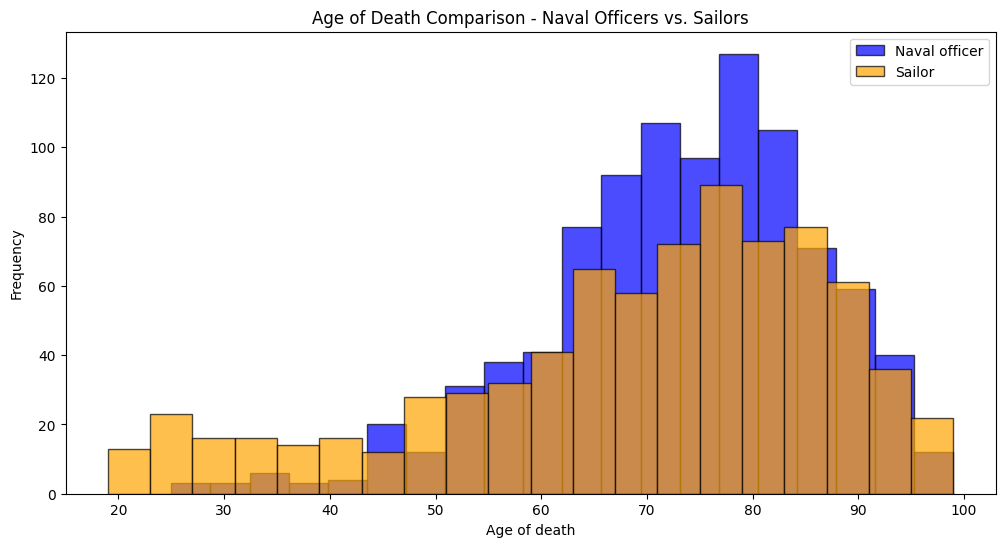

In [ ]:
# Estatísticas descritivas
descricao_oficial = oficial_marinha['Age of death'].describe()
descricao_marinheiro = marinheiro['Age of death'].describe()

# Exibindo os resultados
print("Estatísticas descritivas (Naval Officer):")
print(descricao_oficial)
print("\nEstatísticas descritivas (Sailor):")
print(descricao_marinheiro)

# Criando os histogramas com Pandas
fig, ax = plt.subplots(figsize=(12, 6))

oficial_marinha['Age of death'].plot.hist(
    ax=ax,
    bins=20,
    alpha=0.7,
    label='Naval officer',
    color='blue',
    edgecolor='black',
    xlabel='Age of death',
    ylabel='Frequency'
)

marinheiro['Age of death'].plot.hist(
    ax=ax,
    bins=20,
    alpha=0.7,
    label='Sailor',
    color='orange',
    edgecolor='black',
    xlabel='Age of death',
    ylabel='Frequency'
)

ax.set_title('Age of Death Comparison - Naval Officers vs. Sailors')
ax.legend()
plt.show()
